In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv("C:/Users/Aaditya Gupta/OneDrive/Desktop/AML_A1/df_synA_test_hard_shuffled_sample.csv")

In [4]:
df.head(5)

,Open_n_val,High_n_val,Low_n_val,Close_n_val,Volume_n_val,SMA_10_val,SMA_20_val,CMO_14_val,High_n-Low_n_val,Open_n-Close_n_val,...,SMA_20-SMA_10_changelen_val,Close_n_slope_3_changelen_val,Close_n_slope_5_changelen_val,Close_n_slope_10_changelen_val,row_num,day,era,target_10_val,target_5_val,data_type
0,0.75,0.75,0.50,0.75,0.0,0.25,0.25,1.00,0.75,0.50,...,0.25,0.00,0.75,1.00,96,456,17,0.00,0.25,validation
1,0.00,0.00,0.00,0.25,0.0,0.00,0.00,0.50,0.25,0.00,...,0.00,1.00,1.00,1.00,109,477,14,1.00,1.00,validation
2,0.00,0.25,0.50,0.00,0.0,0.00,0.00,0.25,0.00,0.50,...,1.00,0.00,0.50,0.00,136,514,0,0.75,0.25,validation
3,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.25,0.75,0.25,...,0.00,0.25,0.25,0.25,109,446,15,1.00,1.00,validation
4,0.75,0.75,0.75,0.75,0.0,0.75,0.75,0.75,0.25,0.75,...,0.50,0.00,0.50,0.75,99,535,3,0.25,0.75,validation


In [5]:
df = df.sample(frac=1)

In [6]:
X = df.drop(columns=['era', 'target_10_val','target_5_val','data_type' ])
Y = df['target_10_val']

In [7]:
Y_list = list(Y.unique())
Y_new = np.zeros(len(Y))
Y_Y_new_dict = {}
count = 0
for i in range(len(Y)):
    if(Y[i] not in Y_Y_new_dict):
        Y_Y_new_dict[Y[i]] = count
        Y_new[i] = Y_Y_new_dict[Y[i]]
        count+=1
    else:
        Y_new[i] = Y_Y_new_dict[Y[i]]

In [8]:
from sklearn.metrics.pairwise import cosine_similarity as cos



In [9]:
X_ = X.values
arr = cos(X_[:20000], X_[:20000])

In [10]:
from sklearn.preprocessing import normalize

arr_norm = normalize(arr, norm="l2")

In [12]:
means=[]
for i in arr_norm:
    x = np.mean(i)
    means.append(x)

In [19]:
means

[0.007071053752201257,
 0.0070710500663283314,
 0.007071060089040945,
 0.007071013848183141,
 0.007071058500333752,
 0.00707105606074863,
 0.00707101131460841,
 0.0070710300452047434,
 0.0070710361468741215,
 0.007071058401187101,
 0.007071060516900983,
 0.007071061181884687,
 0.007071048959983511,
 0.007071059438567341,
 0.007071060492838364,
 0.007071050245094537,
 0.0070710605124014204,
 0.007071033111128174,
 0.007071054755476183,
 0.007071036148337427,
 0.00707102673072832,
 0.00707106189540098,
 0.007071028061916356,
 0.007071036296069127,
 0.00707105582579118,
 0.007071010024971578,
 0.007071061480052713,
 0.007071058972884003,
 0.0070710619310572565,
 0.0070710621850581315,
 0.007071060198041794,
 0.007071061913404176,
 0.007071059622413654,
 0.007071059558592782,
 0.007071008858499107,
 0.007071021937149722,
 0.007071051659539252,
 0.0070710242791931,
 0.007071052548832592,
 0.007071057135938583,
 0.007071031830149064,
 0.007071057280741817,
 0.0070710430859919965,
 0.00707100

In [20]:
from collections import Counter

new_labels=[]
for i in range(0,20000):
    lab = []
    for j in range(0,20000):
        # print(i,j)
        if arr[i][j] > 0.997:
            lab.append(Y[j])
    count = Counter(lab)
    most_common_element = max(count, key=count.get)    
    new_labels.append(most_common_element)

In [18]:
new_labels

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [16]:
d={}
for i in new_labels:
    d[i]=0

In [17]:
d

{1.0: 0}

In [21]:
new_labels = np.array(new_labels)

In [22]:
import joblib
from tensorflow.keras.callbacks import LearningRateScheduler

# Generating synthetic sinusoidal dataset with noise
# np.random.seed(0)
# X = np.linspace(0, 1, 1000)
# y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, X.shape[0])

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = X.iloc[:10000], X.iloc[10000:],new_labels,  Y[10000:]

# Define the MLP model
def adap(epoch):
    return 0.0001*epoch

# def nal(y_true, y_pred):


my_sched = LearningRateScheduler(adap)
model = Sequential([
    Dense(256, input_shape=(26,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(12, activation='softmax')  # Output layer with softmax activation for multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=100, validation_split=0.1,callbacks=[my_sched])

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

joblib.dump(model, "C:/Users/Aaditya Gupta/OneDrive/Desktop/AML_A1/model_0.joblib")

Epoch 1/1000
90/90 [==============================] - 1s 5ms/step - loss: 96.6841 - accuracy: 0.0000e+00 - val_loss: 96.5320 - val_accuracy: 0.0000e+00 - lr: 0.0000e+00
Epoch 2/1000
90/90 [==============================] - 0s 3ms/step - loss: 10.8506 - accuracy: 0.7321 - val_loss: 1.0383e-07 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 3/1000
90/90 [==============================] - 0s 3ms/step - loss: 1.2000e-07 - accuracy: 1.0000 - val_loss: 9.9182e-08 - val_accuracy: 1.0000 - lr: 2.0000e-04
Epoch 4/1000
90/90 [==============================] - 0s 3ms/step - loss: 1.1958e-07 - accuracy: 1.0000 - val_loss: 9.9182e-08 - val_accuracy: 1.0000 - lr: 3.0000e-04
Epoch 5/1000
90/90 [==============================] - 0s 3ms/step - loss: 1.1943e-07 - accuracy: 1.0000 - val_loss: 9.9182e-08 - val_accuracy: 1.0000 - lr: 4.0000e-04
Epoch 6/1000
90/90 [==============================] - 0s 3ms/step - loss: 1.1925e-07 - accuracy: 1.0000 - val_loss: 9.9063e-08 - val_accuracy: 1.0000 - lr: 5.0000e-04

TypeError: in user code:

    File "C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1502, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 987, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\compile_utils.py", line 501, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\metrics\base_metric.py", line 646, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Aaditya Gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\metrics\metrics.py", line 3330, in sparse_categorical_accuracy
        if matches.shape.ndims > 1 and matches.shape[-1] == 1:

    TypeError: '>' not supported between instances of 'NoneType' and 'int'


In [54]:
arr_test = cos(X_[10000:20000], X_[10000:20000])
new_labels_test=[]
for i in range(10000):
    lab = []
    for j in range(10000):
        # print(i,j)
        if arr_test[i][j] > 0.995:
            lab.append(Y[10000+j])
    count = Counter(lab)
    most_common_element = max(count, key=count.get)    
    new_labels_test.append(most_common_element)

In [55]:
new_labels_test = np.array(new_labels_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 1.0000
Test Loss: [0.017267053946852684, 1.0]


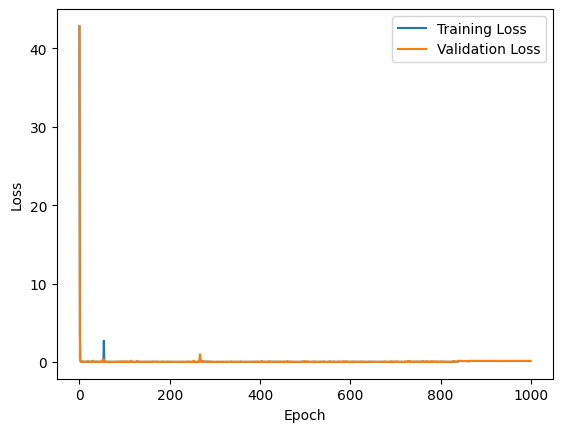

In [56]:
loss = model.evaluate(X_[10000:20000], new_labels_test)
print("Test Loss:", loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
y_test.fillna(0)

10000     0.25
10001     0.25
10002     1.00
10003     1.00
10004     0.00
          ... 
249595    0.75
249596    0.75
249597    1.00
249598    0.25
249599    1.00
Name: target_10_val, Length: 239600, dtype: float64